Spaceship Titanic - Exploratory Data Analysis
In this notebook you'll find the EDA performed to solve Kaggle's competition Spaceship Titanic (https://www.kaggle.com/competitions/spaceship-titanic).

Context

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Import libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format #With this line, we ensure that only 2 decimal places are displayed for each value

Fields and data description

▶ train.csv - Personal records for about two-thirds (8700) of the passengers, to be used as training data.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

▶ test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. sample_submission.csv - A submission file in the correct format.

PassengerId - Id for each passenger in the test set.

Transported - The target. For each passenger, predict either True or False.

In [2]:
#Import and load data
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported\n0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False\n0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True\n0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False\n0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False\n0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True\n0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True\n0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True\n0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,,Candra Jacostaffey,True\n0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,T

In [3]:
df_train = pd.read_csv("train.csv")
print (df_train)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e 39.00  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e 24.00  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e 58.00   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e 33.00  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e 16.00  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e 41.00   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22 18.00  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e 26.00  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e 32.00  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e 44.00  False   

      RoomService  FoodCourt  ShoppingMall      Spa

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e 39.00  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e 24.00  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e 58.00   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e 33.00  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e 16.00  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e 41.00   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22 18.00  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e 26.00  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e 32.00  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e 44.00  False   

      RoomService  

In [7]:
#Import and load data
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name\n0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning\n0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers\n0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus\n0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter\n0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez\n0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks\n0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,,0.0,0.0,0.0,Aldah Ainserfle\n0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry\n0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry\n0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson

In [8]:
df_test = pd.read_csv("test.csv")
print (df_test)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e 27.00  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e 19.00  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e 31.00  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e 38.00  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e 20.00  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e 34.00  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e 42.00  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22 43.00  False   

      RoomService  FoodCourt  ShoppingMall      Spa

In [9]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,"2,823.00",0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,"6,652.00",0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [11]:
df_test.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e 27.00  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e 19.00  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e 31.00  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e 38.00  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e 20.00  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e 34.00  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e 42.00  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22 43.00  False   

      RoomService  

Exploratory Data Analysis

We'll analyze the features and their distribution in detail to get useful insights about the data.

Duplicates

We'll start by checking if there're duplicates in the data received.

In [12]:
print('- For Train dataset')
print('Shape with duplicates: ',df_train.shape)
print('Shape without duplicates: ',df_train.drop_duplicates().shape)

print('\n- For Test dataset')
print('Shape with duplicates: ',df_test.shape)
print('Shape without duplicates: ',df_test.drop_duplicates().shape)

- For Train dataset
Shape with duplicates:  (8693, 14)
Shape without duplicates:  (8693, 14)

- For Test dataset
Shape with duplicates:  (4277, 13)
Shape without duplicates:  (4277, 13)


There are no duplicate records in the datasets

Null values

In this section, we'll check if there are any nulls present in the dataframes.

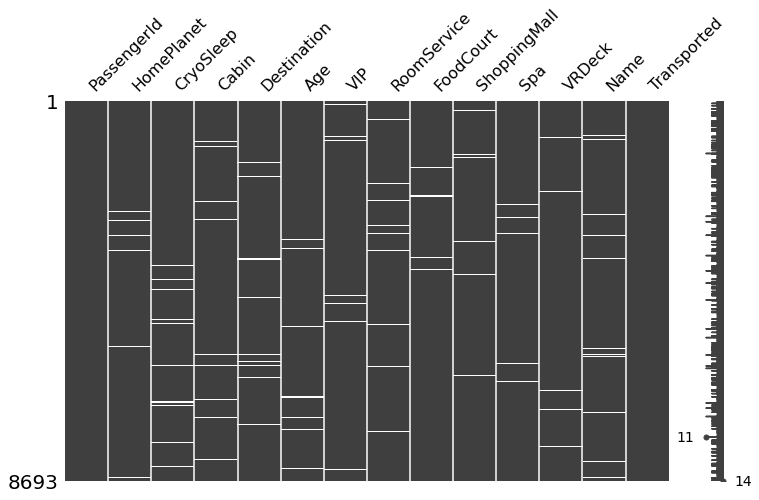

In [13]:
#Train dataset
msno.matrix(df_train, figsize=(12, 7))

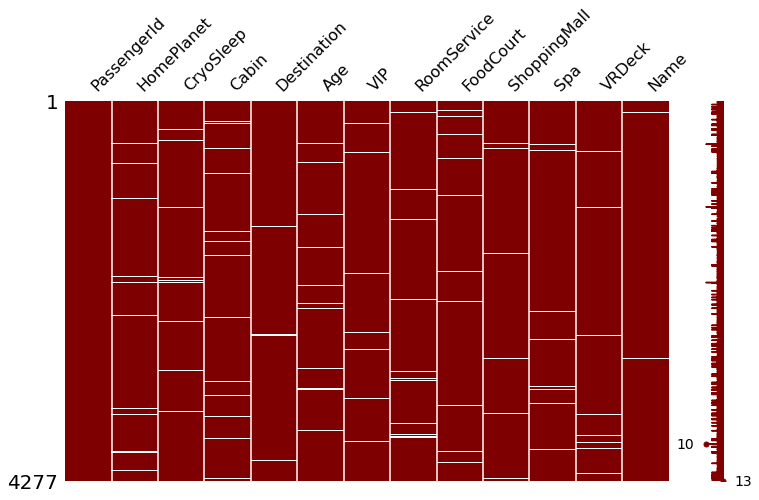

In [14]:
#Test dataset
msno.matrix(df_test, figsize=(12, 7), color=[0.5,0,0])

There aren't a lot of missing values per column, but all columns except Passenger ID have them.

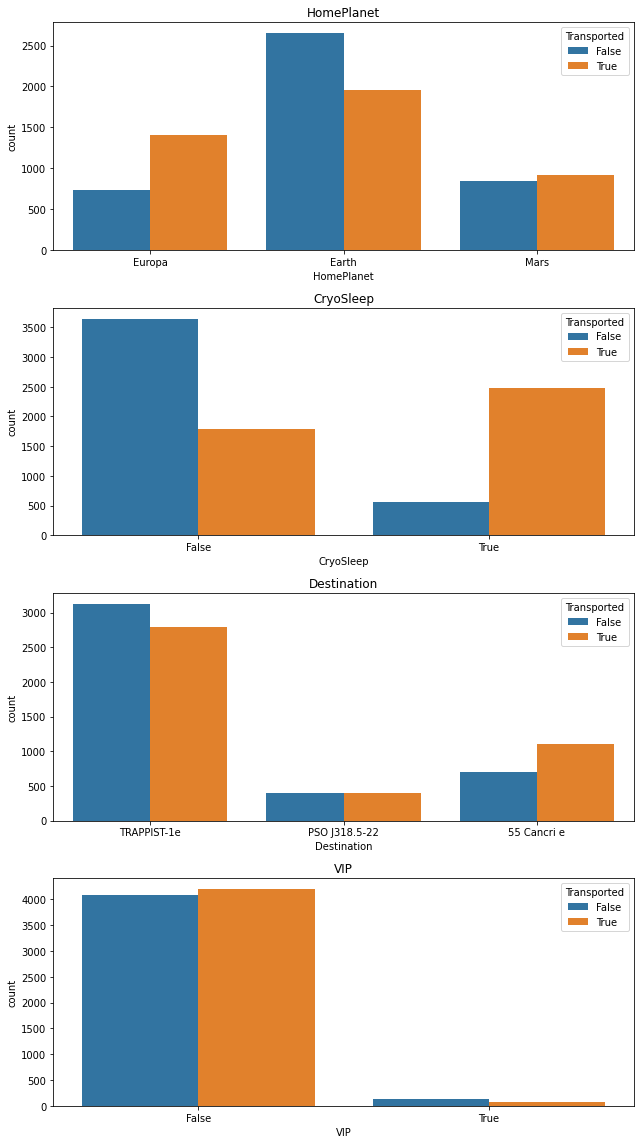

In [15]:
#Create a list with all the categorical features to analyze
categorical_cols=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
#Plot this features
fig=plt.figure(figsize= (9, 16))
for i, var_name in enumerate(categorical_cols):
  ax=fig.add_subplot(len(categorical_cols), 1, i+1)
  sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
  ax.set_title(var_name)
fig.tight_layout()
plt.show()

CryoSleep seems to be an important feature, we can see that most of the people who received CryoSleep were transported.

On the other hand, VIP status doesn't seem to affect the transportation of a passenger. The total counts for each VIP status.

HomePlanet and Destination have influence too. If you come from Europa it seems that you've more chances to be transported than in other home planets; and if you're going to 55 Cancri e you're more likely to be transported.

Let's put some numbers to these probabilities:

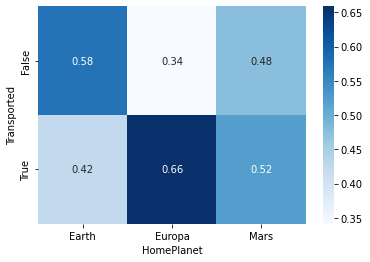

In [16]:
sns.heatmap(pd.crosstab(df_train['Transported'], df_train["HomePlanet"], normalize='columns'), annot=True, cmap= 'Blues')

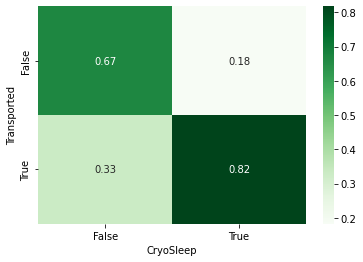

In [19]:
sns.heatmap(pd.crosstab(df_train['Transported'], df_train["CryoSleep"], normalize='columns'), annot=True, cmap= 'Greens')

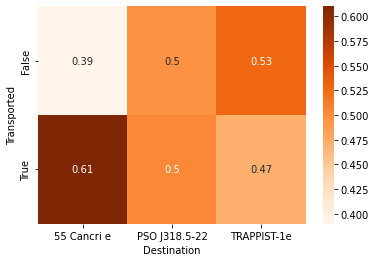

In [18]:
sns.heatmap(pd.crosstab(df_train['Transported'], df_train["Destination"], normalize='columns'), annot=True, cmap= 'Oranges')

Cabin

We'll analyze Cabin separetly. We'll create 3 new columns: Deck, Number and Side

In [20]:
df_train[['Deck', 'Number', 'Side']]=df_train['Cabin'].str.split("/", expand=True)
df_test[['Deck', 'Number', 'Side']]=df_test['Cabin'].str.split("/", expand=True)

In [22]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True,F,1,S


In [24]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Number,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,"2,823.00",0.00,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,"6,652.00",0.00,181.00,585.00,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez,F,5,S


Correclty splited

In [25]:
#Check how many different values for Number are present
len(df_train['Number'].value_counts())

1817

In [26]:
#Check how many different values for Number are present
len(df_test['Number'].value_counts())

1505

There are 1817 different values for the Cabin number in train and 1505 in test, which correspond to the exact cabin number within a deck or a side. We won't consider this information for the moment since it doesn't seem relevant for our purpose.

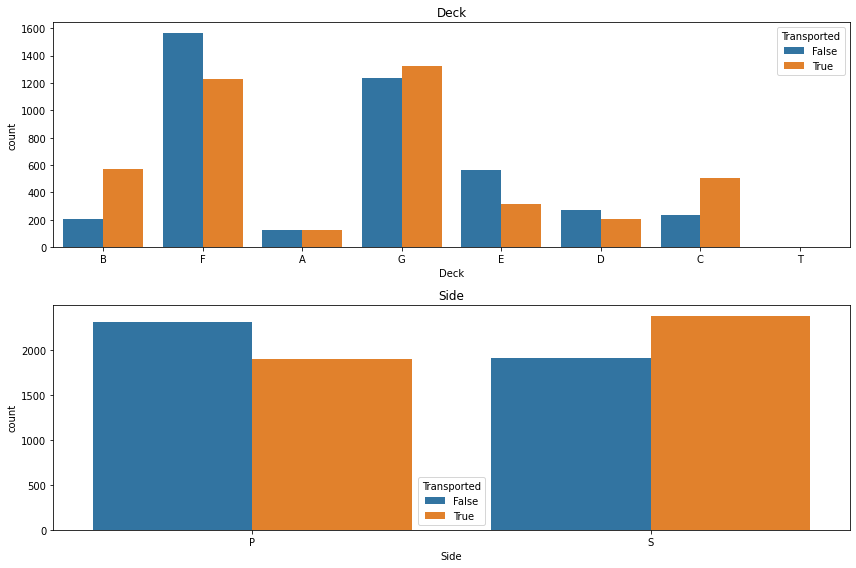

In [27]:
#Plot this features
cabin_cols=['Deck', 'Side']
fig=plt.figure(figsize= (12, 8))
for i, var_name in enumerate(cabin_cols):
  ax=fig.add_subplot(len(cabin_cols), 1, i+1)
  sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
  ax.set_title(var_name)
fig.tight_layout()
plt.show()

There seems to be more probability of being transported if you're on side S of the spaceship.

Some decks like B and C have more probability of being transported than others.

Deck T seems to be an outlier...

In [28]:
df_train[df_train['Deck']=='T']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
1004,1071_01,NaN,False,T/0/P,TRAPPIST-1e,35.00,False,415.00,"1,328.00",0.00,14.00,60.00,Alraida Dingauge,False,T,0,P
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.00,False,0.00,"1,829.00",2.00,"3,133.00","2,447.00",Mergak Headfair,False,T,1,P
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.00,False,0.00,28.00,0.00,"6,841.00",543.00,NaN,False,T,2,P
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.00,False,0.00,"3,135.00",0.00,26.00,3.00,Pent Sessiouse,True,T,3,P
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.00,False,"1,721.00",667.00,NaN,28.00,"1,362.00",Phacton Unsible,False,T,2,S


There are only 5 rows for deck T, we won't drop it for the moment, but we'll keep this in mind. Seems a very VIP deck though.

Analysis of Numerical Features

Age

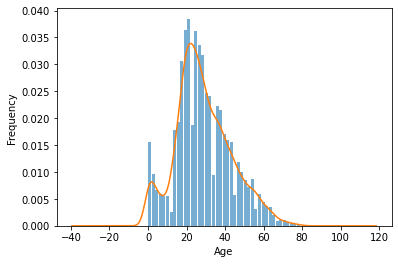

In [29]:
plt.hist(x=df_train['Age'], bins= 'auto', rwidth=0.85, density= True, alpha= 0.6)
df_train['Age'].plot(kind= 'density')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [30]:
print(df_train['Age'].describe())
print(df_train['Age'].median())

count   8,514.00
mean       28.83
std        14.49
min         0.00
25%        19.00
50%        27.00
75%        38.00
max        79.00
Name: Age, dtype: float64
27.0


This distribution is a right skewed plot, this information is usefull to input missing values. For this kind of distributions, we can input nulls by the median or the mean.

We can take a closer look to see the distribution between Transported and not Transported people per age bin.

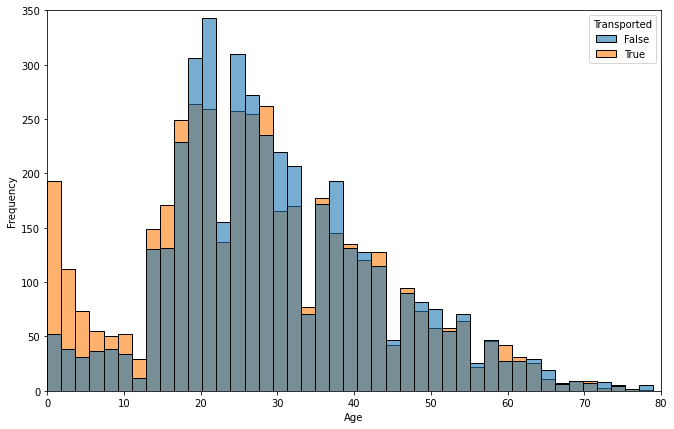

In [31]:
plt.figure(figsize=(11,7))
sns.histplot(data=df_train, x='Age', bins= 'auto', alpha= 0.6, hue= 'Transported')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([0,80])
plt.ylim([0, 350])
plt.show()

It seems that young people have more chances to be transported, specially people within 0-10 years old.

Expenses

Let's create a column that sums all the expenses to check the distribution

In [32]:
Expense_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]

In [33]:
df_train['Expenses']= df_train[Expense_features].sum(axis=1)

In [34]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side,Expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False,B,0,P,0.00
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True,F,0,S,736.00
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False,A,0,S,"10,383.00"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False,A,0,S,"5,176.00"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True,F,1,S,"1,091.00"


In [35]:
df_train['Expenses'].describe()

count    8,693.00
mean     1,440.87
std      2,803.05
min          0.00
25%          0.00
50%        716.00
75%      1,441.00
max     35,987.00
Name: Expenses, dtype: float64

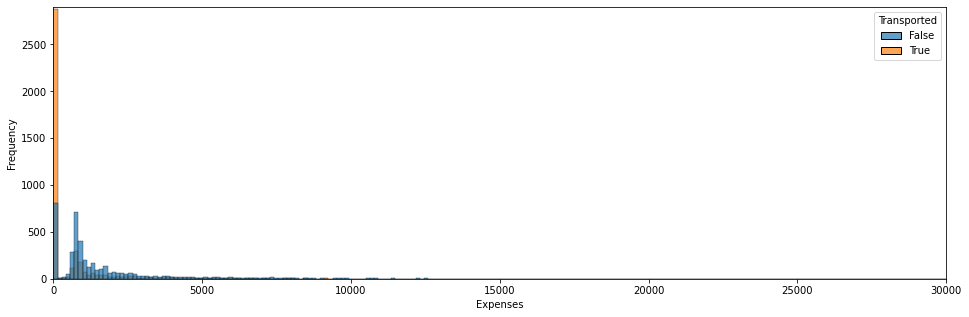

In [36]:
fig=plt.figure(figsize= (16, 5))
sns.histplot(data=df_train, x='Expenses', bins= 'auto', alpha= 0.7, hue= 'Transported')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.xlim((0,30000))
plt.ylim((0, 2900))
plt.show()

We can observe on this graph that we've a skewed distribution for the new feature created "Expenses". We'll create a pairplot below where we can see, among other things, the distribution for each expense.

When preparing features to ingest in ML algorithms, we can apply a logarithm transformation to variables with this distribution to reduce the skew.

In [37]:
df_train['Expenses'].skew()

4.417588190022683

Pairplot

Let's look at a pairplot for all numerical variables to get the complete overview.

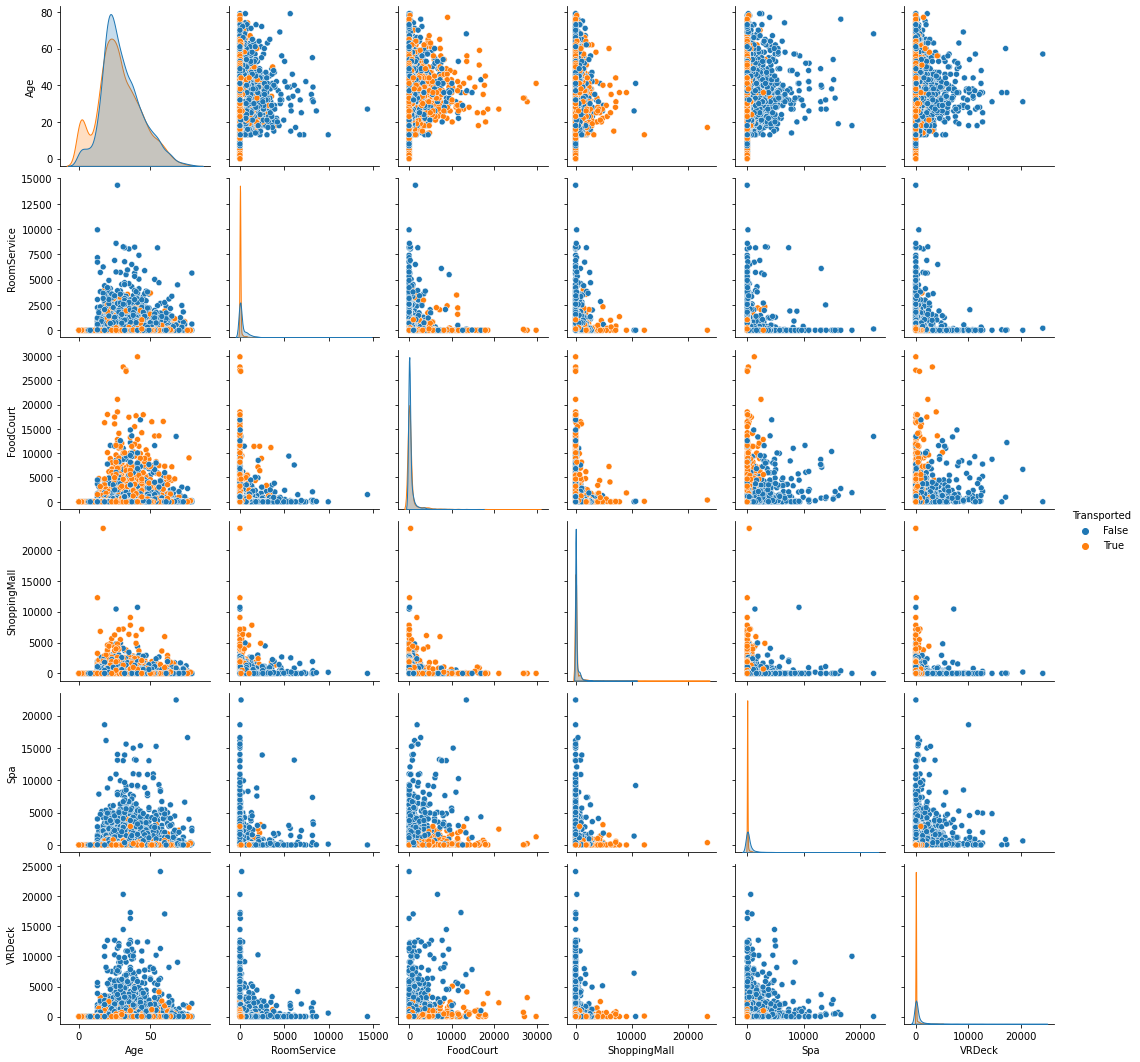

In [38]:
sns.pairplot(data=df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']], hue= 'Transported')
plt.show()

All the distribution for the Expenses columns are skewed.
People that didn't spend on Spa, VRDeck and Room service seem to have more chances of being transported.
Young people spent less money on all of the expenses (which was expectable).